In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [18,10]

### The curse of dimensionality

- This Chapter will cover:
    - How models tend to overfit in high dimensional data
    - How to find low quality features and how to remove them 
    
#### Dimensionality in action
- Seperate the feature we want to predict from the ones to train the model on
- Perform a 70% train and 30% test data split
- Create a Support Vector Machine Classifier and fit to the training data
- If there are few features the features will overlap and we will not be able to maximize our accuracy
- We can solve this problem by increasing the number of features in our dataset. 
- As the number of features increases the number of observations should increase exponentally to stop the model from overfitting the data
- This gets increasingly difficult in high dimensional datasets thus the term: **The Curse of Dimensionality**

In [3]:
cols = ['Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight']

In [4]:
df_m = pd.read_csv('data/ANSUR_II_MALE.csv')
df_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df_m.iloc[:500, :], df_f.iloc[:500, :]], axis=0)
ansur_df = ansur_df[cols]
ansur_df.shape

(1000, 92)

In [5]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

300 rows in test set vs. 700 in training set. 91 Features.


In [6]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

94.7% accuracy on test set vs. 94.0% on training set


Note to self:

In the datacamp exercises the training set accuracy is 100% and the test set accuracy is 42%.

This is to show overfitting being a byproduct of too many dimensions.

I did not use their DataFrame, so my results are different.

In [7]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

94.7% accuracy on test set vs. 94.1% on training set


### Features with missing values or little variance

- Creating a feature selector

In [8]:
df_m = pd.read_csv('data/ANSUR_II_MALE.csv')
df_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df_m, df_f], axis=0)
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur_df = ansur_df.drop(non_numeric, axis=1)
ansur_df.shape

(6068, 94)

In [9]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=1)
sel.fit(ansur_df)

mask = sel.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]


In [10]:
reduced_df = ansur_df.loc[:, mask]
print(reduced_df.shape)

(6068, 93)


### Variance selector caveats

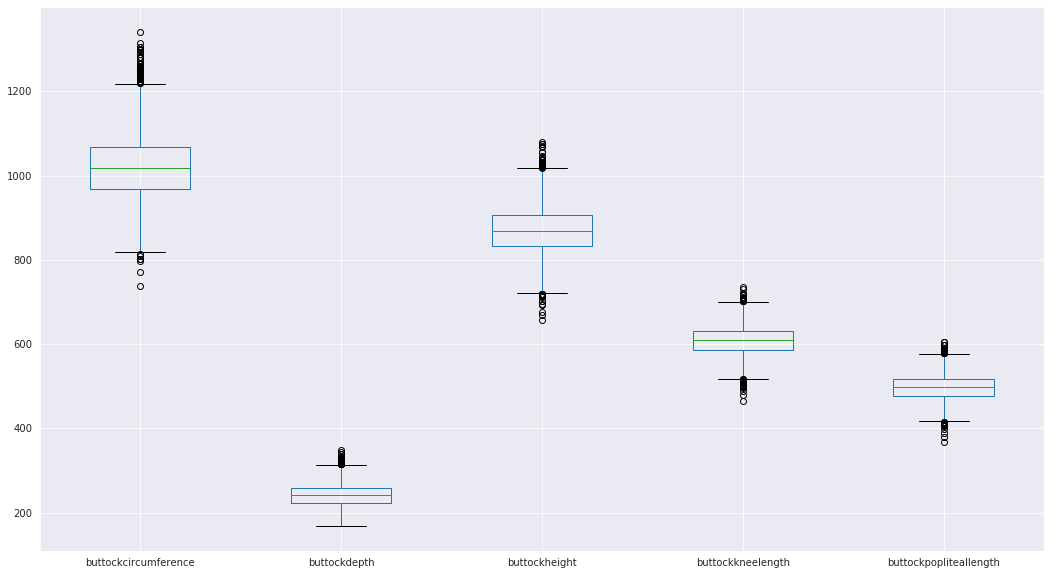

In [11]:
df_m = pd.read_csv('data/ANSUR_II_MALE.csv')
df_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df_m, df_f], axis=0)

import re
buttocks_cols = [i for i in ansur_df.columns if re.match('buttock', i)]
buttock_df = ansur_df[buttocks_cols]
buttock_df.boxplot()

- Higher values have higher variance and therefore should be normalized before feature selection=

In [12]:
df_m = pd.read_csv('data/ANSUR_II_MALE.csv')
df_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df_m, df_f], axis=0)
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur_df = ansur_df.drop(non_numeric, axis=1)

In [13]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.005)

sel.fit(ansur_df / ansur_df.mean())

VarianceThreshold(threshold=0.005)

In [14]:
mask = sel.get_support()
reduced_df = ansur_df.loc[:, mask]
print(reduced_df.shape)

(6068, 45)


### Counting missing values

In [15]:
pokemon_df = pd.read_csv('data/pokemon.csv')
pokemon_df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [16]:
pokemon_df.isna().sum() / len(pokemon_df)

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

### Applying a missing value threshold

In [17]:
# Fewer than 30% missing values = True value
mask = pokemon_df.isna().sum() / len(pokemon_df) < 0.3
print(mask)

#              True
Name           True
Type 1         True
Type 2        False
Total          True
HP             True
Attack         True
Defense        True
Sp. Atk        True
Sp. Def        True
Speed          True
Generation     True
Legendary      True
dtype: bool


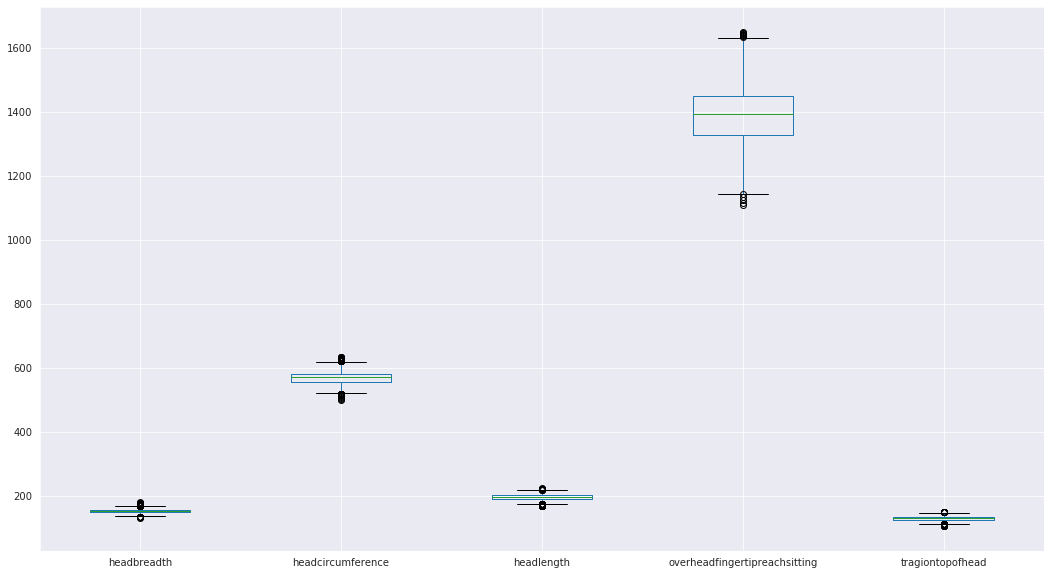

In [23]:
df_m = pd.read_csv('data/ANSUR_II_MALE.csv')
df_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
ansur_df = pd.concat([df_m, df_f], axis=0)

import re
head_cols = [i for i in ansur_df.columns if re.search('head', i)]
head_df = ansur_df[head_cols]
head_df.boxplot()

- Again the columns are not an exact match of DataCamp's assignment
    - n_hairs?

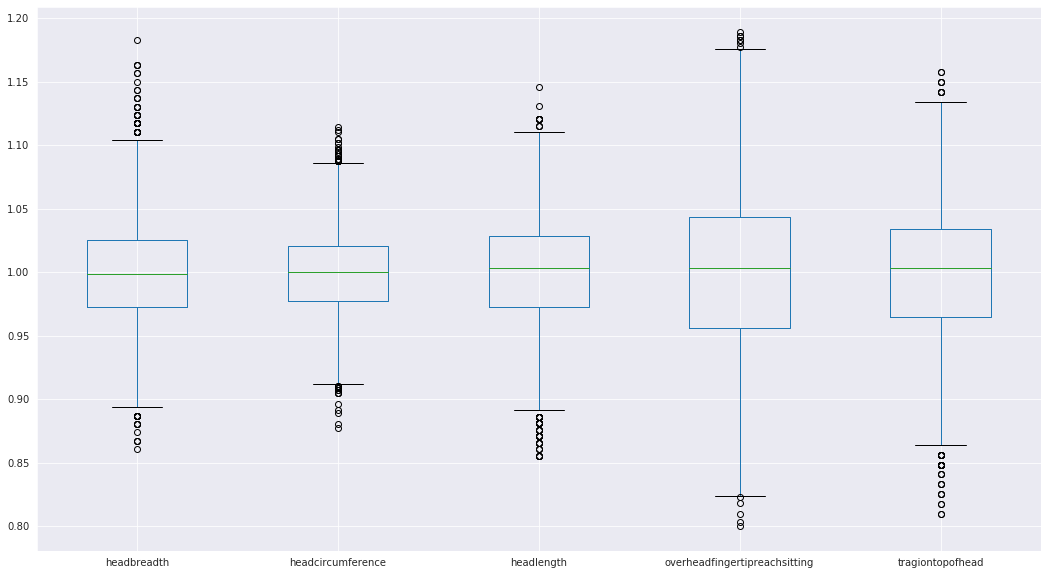

In [24]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [25]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth                      0.001679
headcircumference                0.001030
headlength                       0.001868
overheadfingertipreachsitting    0.003823
tragiontopofhead                 0.002640
dtype: float64


- This exerice makes less sense without the artifical columns DataCamp threw into the exercise, here we are just going to drop the lowest variance

In [26]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.0011)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 5 to 4.


In [27]:
school_df = pd.read_csv('data/Public_Schools2.csv')

In [28]:
school_df.isna().sum() / len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

In [30]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


### Pairwise correlation
#### Correlation coefficient
![corr_coef](data/corr_coef.png)
#### Corr